# Naive Bayes Classifier

## Defining the Question

Spam emails can be annoying and fill up email inboxes with messages that can contain irrelevant marketing material, fake news and unsavory content.  
Individuals have the option to mark emails as spam, which gives data on what the content of spam emails is and the content that personal, non-spam emails contain. This data can be used to create generalised spam filters that can identify characteristics of spam emails and flag them so that the user does not see them in their inbox.  
These filters must have a high enough prediction accuracy to avoid misclassifying personal mail as spam, but not to let too many spam emails into the inbox.

The question for this analysis is: Can a general purpose spam detection filter be built by using non-spam emails to identify indicators of non-spam?

The project will be considered successful if the prediction gives ~7% misclassification error.

## Methodology

1. Data understanding
2. Data exploration
3. Data cleaning
4. Univariate and multivariate analysis
5. Building the model (Naive Bayes Classification)
6. Evaluating the model

## Data Understanding

The data used for this analysis is from a SPAM E-mail Database with the following source:  
Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304  
Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835  
Generated: June-July 1999  

It has previously been used for determining whether an email is spam or not, which means that this data is relevant and sufficient for this analysis.  

Data description:
The first 54 features (continuous, real [0,100] indicate the percent of words in an email matching a particular word (any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string) or character.  
The run-length attributes (55-57) measure the length of sequences of consecutive capital letters (continuous real/integer [1,...].  
The last attribute (nominal {0,1} class) denotes whether the e-mail was considered spam (1) or not (0).  

The data provided is a csv file with two accompanying text documentation files.

## Data Exploration

In [4]:
# Importing libraries
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
import seaborn as sns

In [5]:
# Putting the feature names in a list
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',
'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business',
'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[',
'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 
'capital_run_length_total', 'spam']

In [6]:
# Loading the data
df_spam = pd.read_csv('spambase.data', names = names)
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
df_spam.shape

(4601, 58)

The data set has 58 features and 4210 records, which will be sufficient to build a model.

In [8]:
# Overview of the statistics
df_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


The spam column (dependent variable) is binary., while the rest seem to be continuous with most values as 0.

In [9]:
# Data types and checking for missing values
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

All data is in the correct format, and there are no missing values

## Data Cleaning

In [10]:
# Checking for duplicates
df_spam.duplicated().sum()

391

The duplicated records are only a small fraction of the total records, so they can be dropped from the data.

In [11]:
# Dropping duplicated records
df_spam = df_spam.drop_duplicates()
df_spam.duplicated().sum()

0

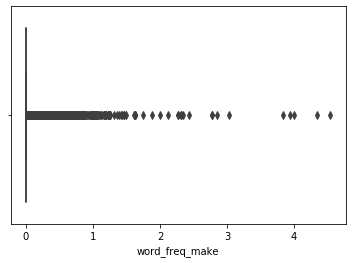

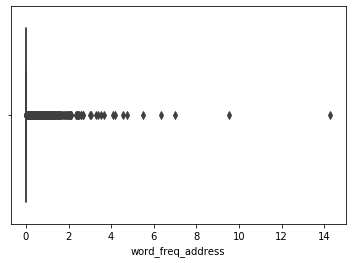

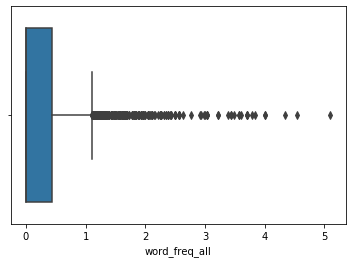

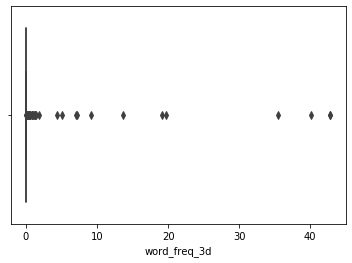

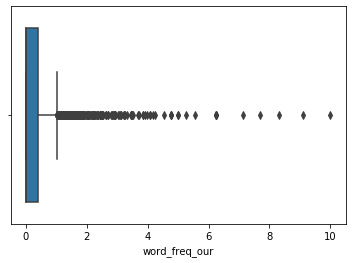

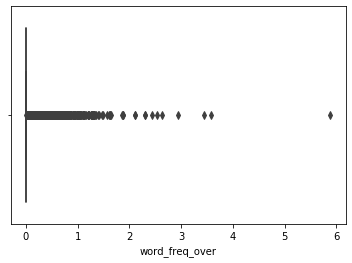

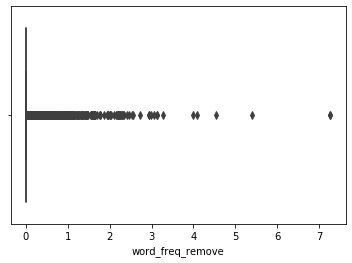

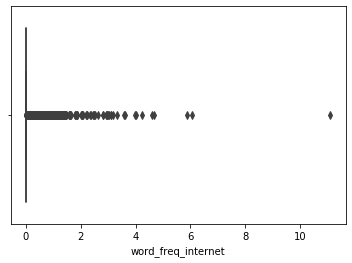

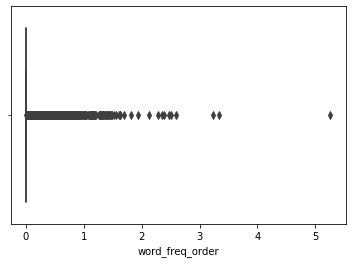

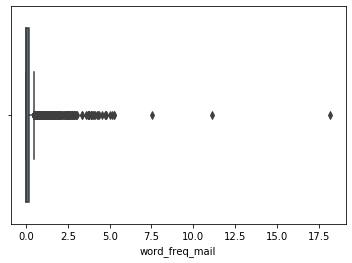

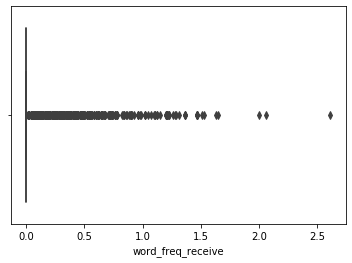

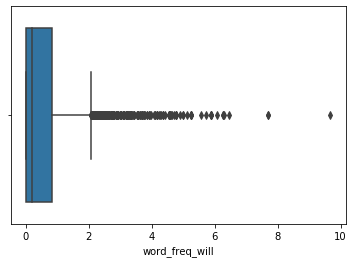

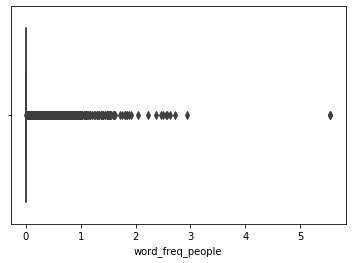

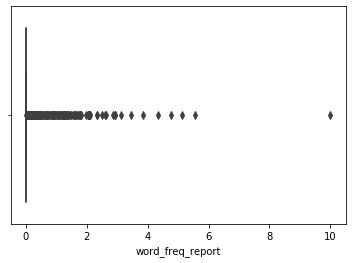

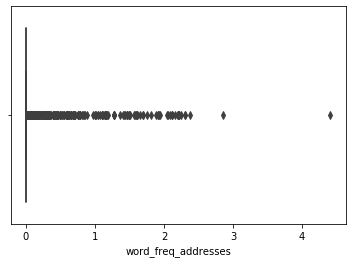

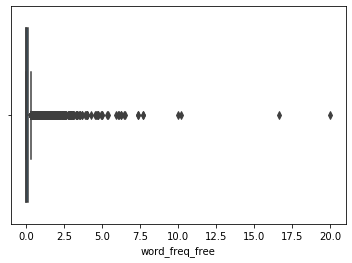

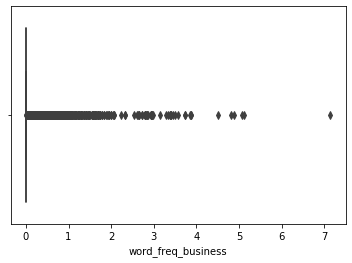

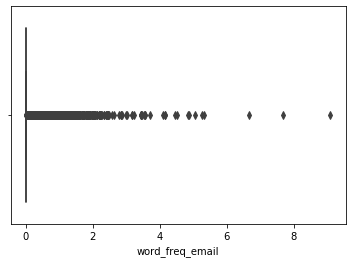

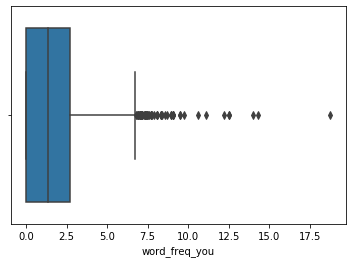

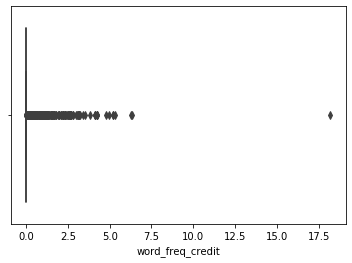

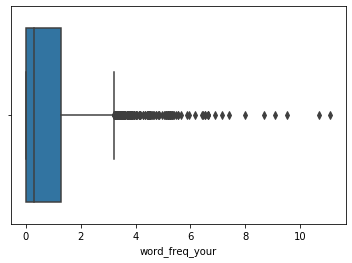

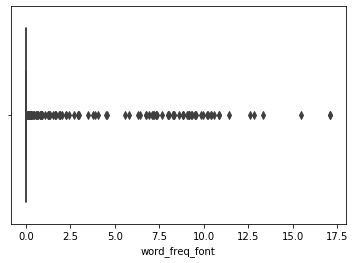

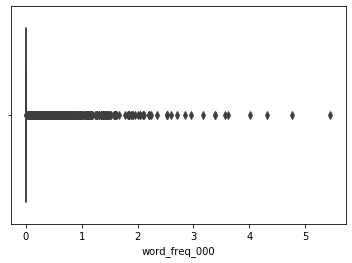

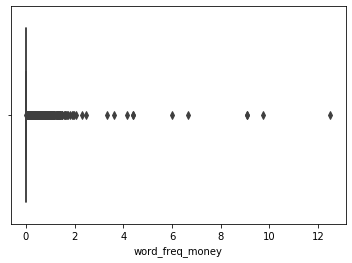

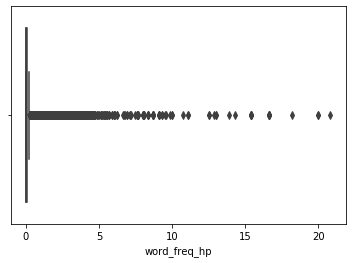

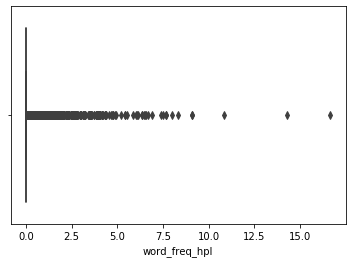

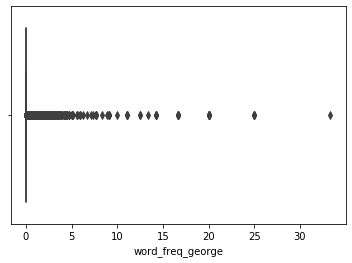

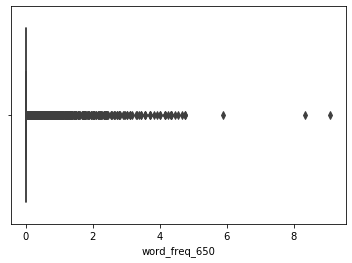

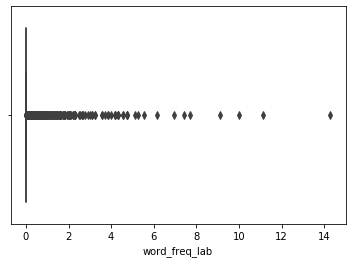

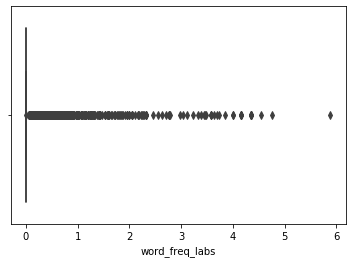

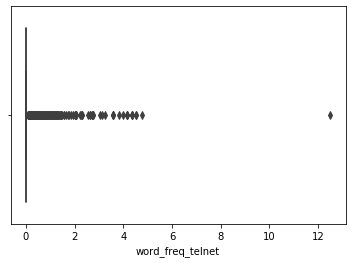

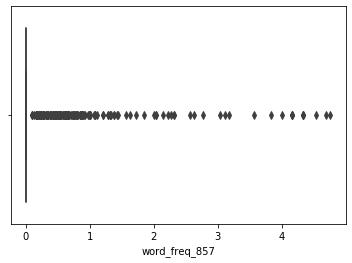

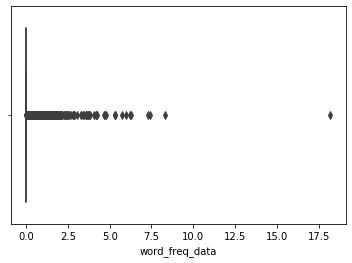

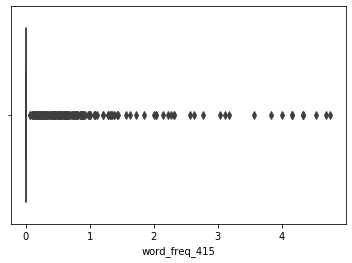

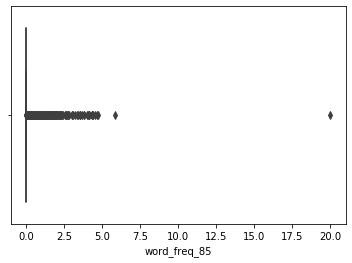

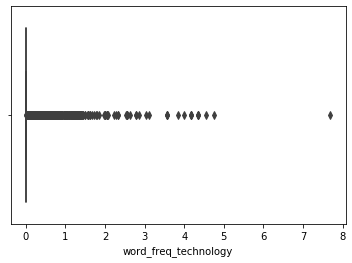

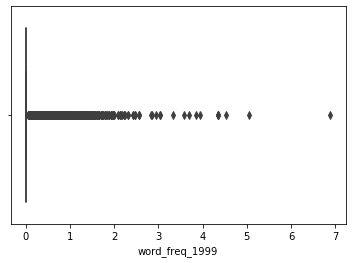

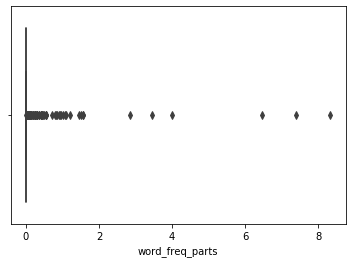

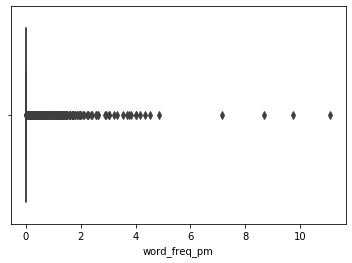

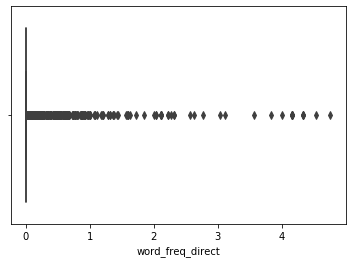

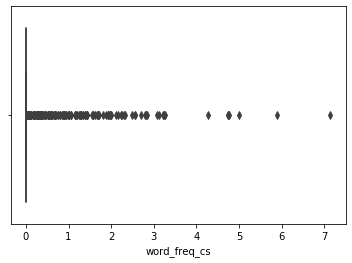

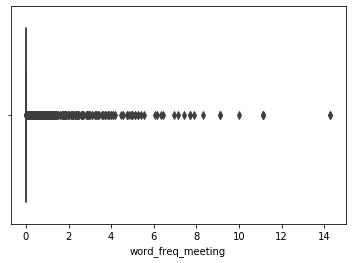

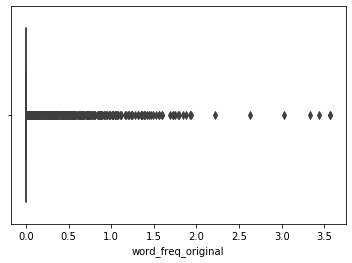

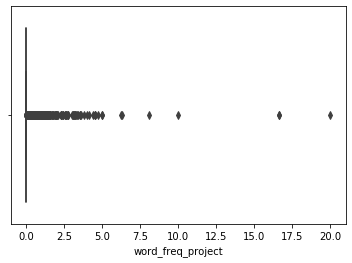

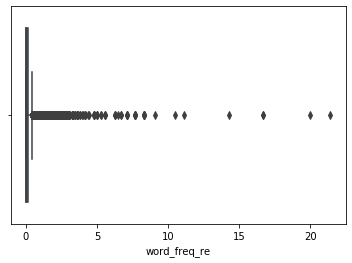

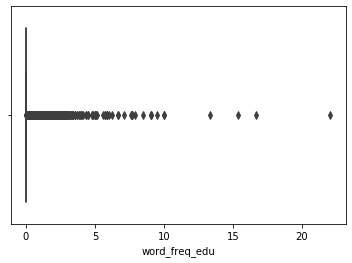

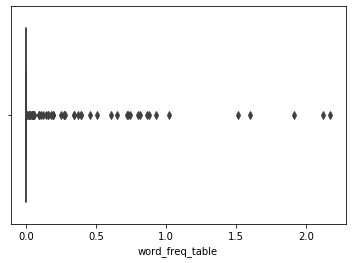

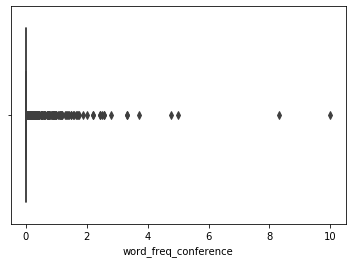

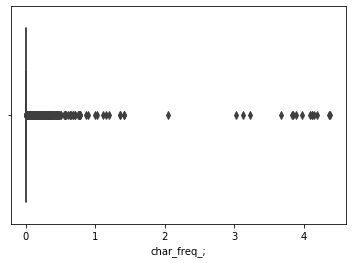

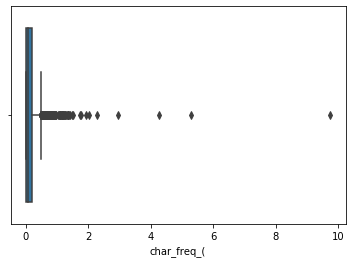

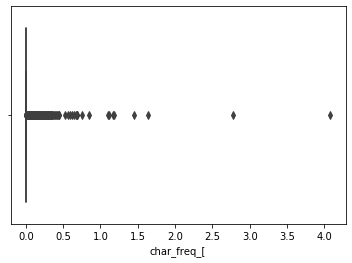

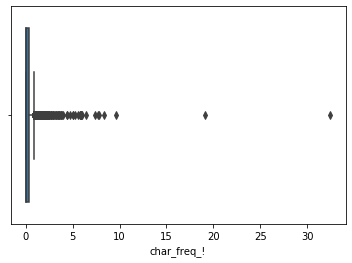

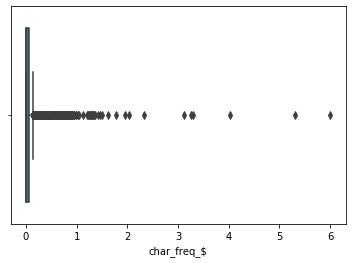

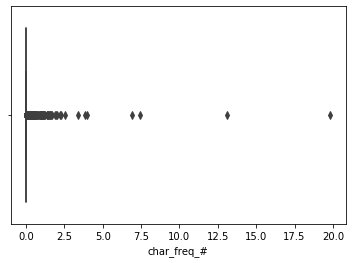

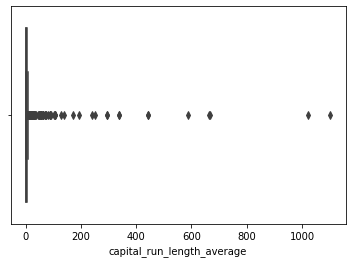

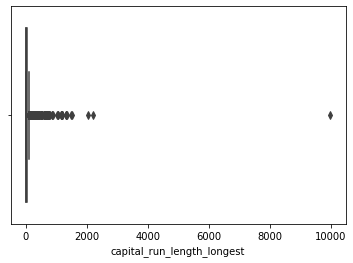

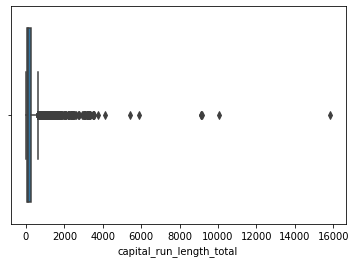

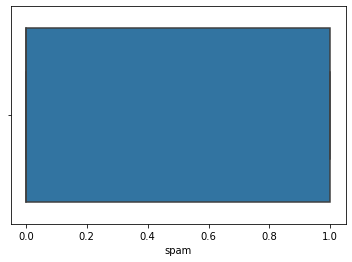

In [12]:
# Checking for outliers
for col in df_spam:
    plt.figure()
    sns.boxplot(df_spam[col])

There are multiple zero values which will result in zero frequency in the model. This will be corrected with smoothing when optimizing the model.

## Exploratory Data analysis

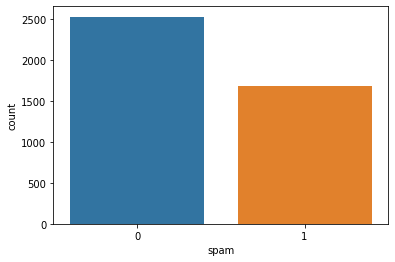

In [13]:
# Plotting spam variable
sns.countplot(df_spam['spam'])

The dependent variable is not balanced, so the data be sampled to balance between the two classes.

## Multivariate Analysis

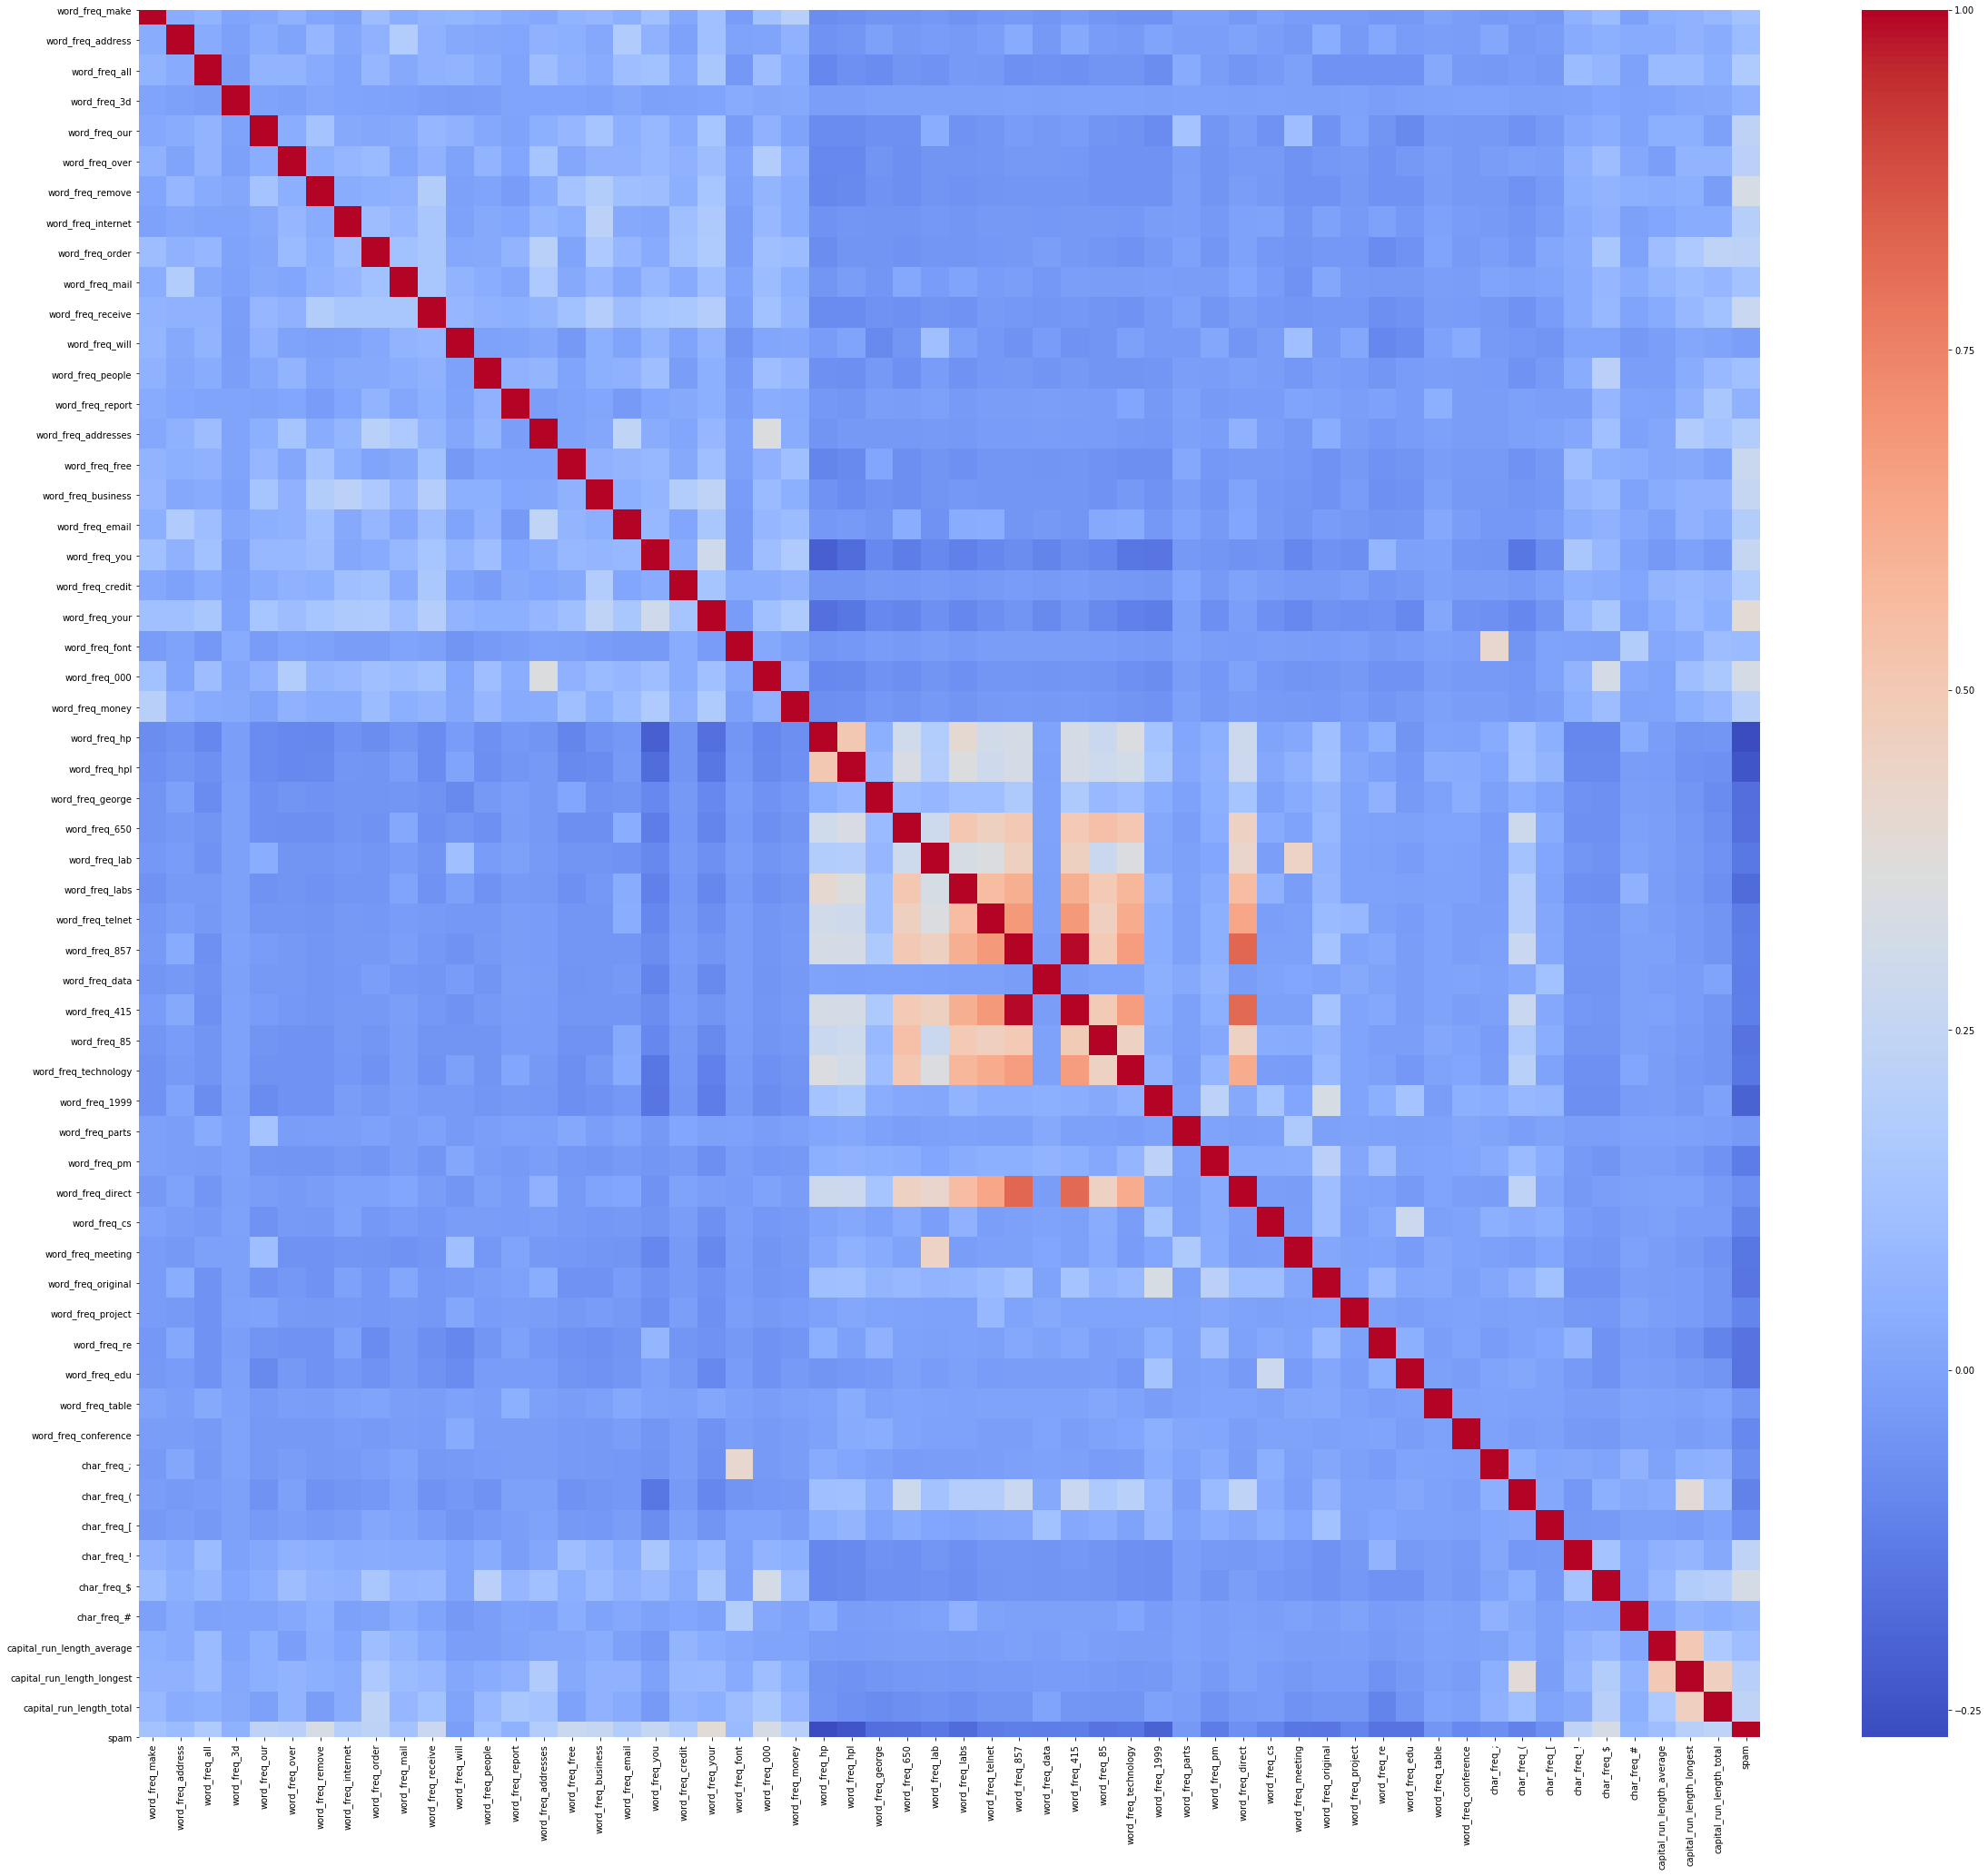

In [14]:
corr = df_spam.corr()

f, ax = plt.subplots(figsize=(40, 35))
corr = df_spam.corr()
sns.heatmap(corr, cmap = 'coolwarm',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

There are some highly correlated features that will be dealt with when optimizing the model.

## Model - Naive Bayes Classifier

In [15]:
#Checking the distribution of spam vs non-spam emails
df_spam['spam'].value_counts()

0    2531
1    1679
Name: spam, dtype: int64

The data is imbalanced, so the predictions that the model gives may be more accurate for emails that are not spam.
We will create a new balanced dataset by resampling with replacement for spam emails, until the number of records for each class are even.

In [16]:
# Separate majority and minority classes
from sklearn.utils import resample

df_majority = df_spam[df_spam.spam==0]
df_minority = df_spam[df_spam.spam==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,  
                                 n_samples=2531,    # no of passengers that did not survive
                                 random_state=0) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [17]:
#Checking the distribution of passengers that survived vs those that did not survive
df_upsampled['spam'].value_counts()

1    2531
0    2531
Name: spam, dtype: int64

The records are now evenly distributed between classes.

In [18]:
# Splitting the data into independent and dependent variables
X = df_upsampled.drop(columns = 'spam').values
y = df_upsampled.spam.values

# Splitting the data into train and test data sets, with 20% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Training a multinomial naive Bayes classification model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

# Making predictions and evaluating model performance
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

X train: (4049, 57) X test: (1013, 57) y train: (4049,) y test: (1013,)
0.8035538005923001
[[444  75]
 [124 370]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       519
           1       0.83      0.75      0.79       494

    accuracy                           0.80      1013
   macro avg       0.81      0.80      0.80      1013
weighted avg       0.81      0.80      0.80      1013



In [19]:
# Splitting the data into independent and dependent variables
X = df_upsampled.drop(columns = 'spam').values
y = df_upsampled.spam.values

# Splitting the data into train and test data sets, with 30% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Training a multinomial naive Bayes classification model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

# Making predictions and evaluating model performance
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

X train: (3543, 57) X test: (1519, 57) y train: (3543,) y test: (1519,)
0.8057932850559578
[[655 117]
 [178 569]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       772
           1       0.83      0.76      0.79       747

    accuracy                           0.81      1519
   macro avg       0.81      0.81      0.81      1519
weighted avg       0.81      0.81      0.81      1519



In [20]:
# Splitting the data into independent and dependent variables
X = df_upsampled.drop(columns = 'spam').values
y = df_upsampled.spam.values

# Splitting the data into train and test data sets, with 40% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Training a multinomial naive Bayes classification model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

# Making predictions and evaluating model performance
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

X train: (3037, 57) X test: (2025, 57) y train: (3037,) y test: (2025,)
0.8069135802469136
[[866 161]
 [230 768]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1027
           1       0.83      0.77      0.80       998

    accuracy                           0.81      2025
   macro avg       0.81      0.81      0.81      2025
weighted avg       0.81      0.81      0.81      2025



The best split for this model is with 40% test data as it has the best test accuracy.  
The model will now be improved by smoothing to avoid zero frequency, and removing correlated features.

In [26]:
# Creating a parameter grid for cross validation based on the random grid
param_grid = {
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    }

# Finding the best parameters using randomized search cross validation
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(estimator = MultinomialNB(), param_distributions = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fitting the model to get the best parameters
cv_result = cv.fit(X_train, y_train)
cv_result.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    3.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.3s finished


{'alpha': 0.01}

## Smoothing

In [27]:
# Splitting the data into independent and dependent variables
X = df_upsampled.drop(columns = 'spam').values
y = df_upsampled.spam.values

# Splitting the data into train and test data sets, with 40% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Training a multinomial naive Bayes classification model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha= 0.01).fit(X_train, y_train)

# Making predictions and evaluating model performance
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

X train: (3037, 57) X test: (2025, 57) y train: (3037,) y test: (2025,)
0.8093827160493827
[[868 159]
 [227 771]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1027
           1       0.83      0.77      0.80       998

    accuracy                           0.81      2025
   macro avg       0.81      0.81      0.81      2025
weighted avg       0.81      0.81      0.81      2025



Smoothing has no effect on accuracy of prediction.

## Removing correlated features

In [28]:
# Calculating VIF scores
vif =pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)
vif

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.101450,-0.004258,-0.016107,-0.001599,0.007134,-0.014006,0.032895,0.048494,-0.061818,-0.005302,...,0.010822,-0.007722,0.021812,-0.019639,-0.017965,0.007037,-0.031584,0.008650,-0.040019,0.017967
word_freq_address,-0.004258,1.107986,0.003902,0.016125,-0.010141,0.016181,-0.037115,0.015532,-0.005847,-0.189242,...,-0.029043,0.044266,0.017044,-0.004061,-0.015979,-0.027783,0.001481,-0.037494,-0.004253,-0.013719
word_freq_all,-0.016107,0.003902,1.096759,0.026681,-0.011308,-0.015840,0.037645,0.033687,-0.020911,0.023795,...,0.004193,-0.012425,0.011985,-0.057687,0.011628,0.008159,-0.089941,-0.006818,-0.000336,-0.074631
word_freq_3d,-0.001599,0.016125,0.026681,1.009493,0.010155,0.021284,0.001560,0.002105,0.011507,0.002516,...,0.008908,0.023760,0.006357,0.014313,0.007629,0.010402,0.013059,-0.033460,-0.003156,-0.082426
word_freq_our,0.007134,-0.010141,-0.011308,0.010155,1.139481,0.001406,-0.046338,0.041085,0.048843,0.004994,...,-0.007988,0.023191,0.000155,0.047257,0.032241,0.007414,-0.036345,-0.023949,0.059177,-0.250952
word_freq_over,-0.014006,0.016181,-0.015840,0.021284,0.001406,1.087195,0.015354,-0.037792,-0.037802,0.041113,...,0.004699,-0.013665,-0.000416,-0.012365,-0.003241,-0.012484,0.053609,-0.035157,0.020631,-0.145078
word_freq_remove,0.032895,-0.037115,0.037645,0.001560,-0.046338,0.015354,1.196243,0.074263,0.022452,-0.003232,...,-0.007121,0.032476,0.002851,0.037879,0.018025,-0.038248,-0.000762,-0.053139,0.120032,-0.382779
word_freq_internet,0.048494,0.015532,0.033687,0.002105,0.041085,-0.037792,0.074263,1.118973,-0.028892,-0.039210,...,-0.001390,0.020886,0.014462,0.018131,0.024737,0.009222,0.015707,-0.007116,0.027861,-0.162059
word_freq_order,-0.061818,-0.005847,-0.020911,0.011507,0.048843,-0.037802,0.022452,-0.028892,1.197584,-0.054166,...,-0.016508,0.070386,-0.037727,0.012577,-0.069566,0.004602,-0.058411,-0.020593,-0.174587,-0.083005
word_freq_mail,-0.005302,-0.189242,0.023795,0.002516,0.004994,0.041113,-0.003232,-0.039210,-0.054166,1.122142,...,-0.017752,0.005341,-0.019418,-0.004889,-0.011857,-0.031523,-0.048536,-0.023833,-0.006017,-0.020153


In [29]:
# Identifying features with VIF over 5
vif[vif>5].sum()

word_freq_make                  0.000000
word_freq_address               0.000000
word_freq_all                   0.000000
word_freq_3d                    0.000000
word_freq_our                   0.000000
word_freq_over                  0.000000
word_freq_remove                0.000000
word_freq_internet              0.000000
word_freq_order                 0.000000
word_freq_mail                  0.000000
word_freq_receive               0.000000
word_freq_will                  0.000000
word_freq_people                0.000000
word_freq_report                0.000000
word_freq_addresses             0.000000
word_freq_free                  0.000000
word_freq_business              0.000000
word_freq_email                 0.000000
word_freq_you                   0.000000
word_freq_credit                0.000000
word_freq_your                  0.000000
word_freq_font                  0.000000
word_freq_000                   0.000000
word_freq_money                 0.000000
word_freq_hp    

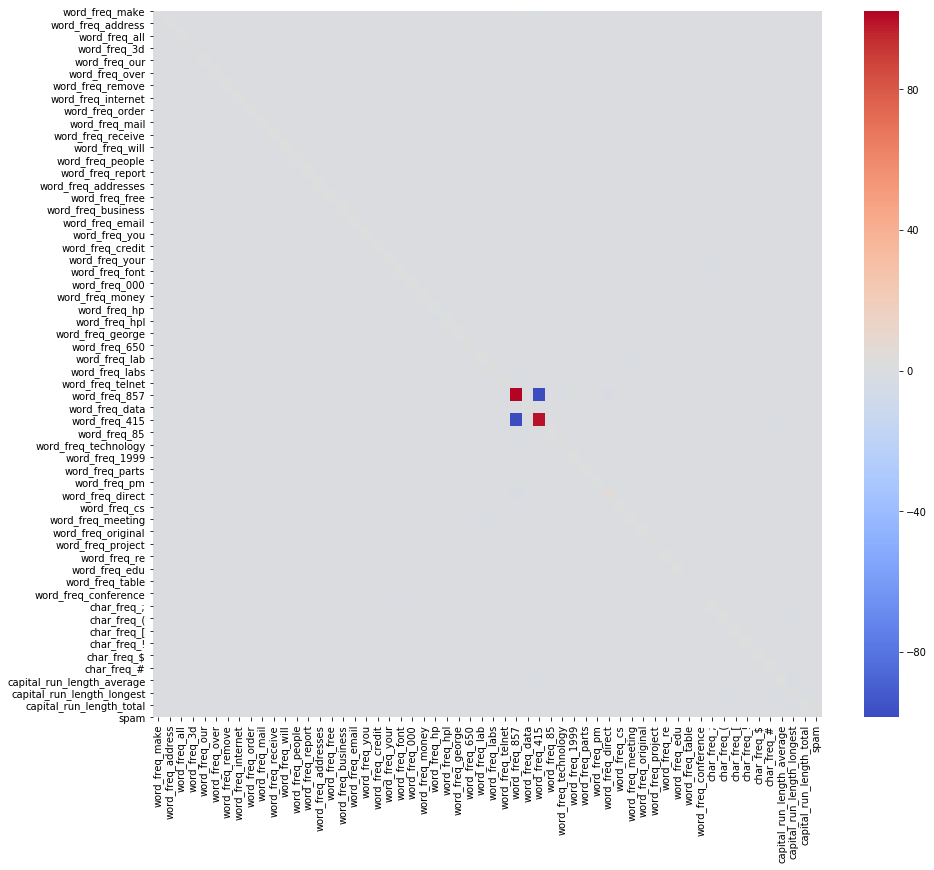

In [30]:
# Plotting VIF scores
f, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(vif, cmap = 'coolwarm',
            xticklabels=vif.columns.values,
            yticklabels=vif.columns.values)

In [31]:
# Calculating correlation scores after dropping the most highly correlated column
new_corr = df_spam.drop(columns = 'word_freq_857').corr()
new_corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,...,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,...,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,...,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,...,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,...,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,...,-0.021744,-0.011584,-0.016729,0.058121,0.105927,0.020413,-0.013554,0.065709,0.063403,0.212311
word_freq_remove,0.011061,0.077374,0.028581,0.014289,0.135957,0.046868,1.000000,0.033692,0.049238,0.055695,...,-0.034080,-0.061318,-0.029466,0.050992,0.067236,0.049306,0.039174,0.050825,-0.017081,0.334456
word_freq_internet,-0.004370,0.013706,0.007221,0.003801,0.023411,0.079704,0.033692,1.000000,0.106890,0.079045,...,-0.028976,-0.042751,-0.021383,0.029031,0.053569,-0.008121,0.009977,0.035603,0.036895,0.200666
word_freq_order,0.103842,0.053426,0.077561,-0.001040,0.014483,0.097037,0.049238,0.106890,1.000000,0.123366,...,-0.015004,-0.037377,0.017321,0.035937,0.152457,-0.002075,0.110788,0.166299,0.233198,0.221454
word_freq_mail,0.040829,0.184304,0.025138,-0.003845,0.027233,0.010099,0.055695,0.079045,0.123366,1.000000,...,0.006772,-0.004960,0.003800,0.031602,0.077405,0.034482,0.073128,0.101546,0.078587,0.131686


In [32]:
# Checking VIF scores
new_vif =pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns=new_corr.columns)
new_vif

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.099338,-0.001887,-0.015742,-0.001462,0.007719,-0.013537,0.033399,0.048645,-0.061080,-0.005854,...,0.011215,-0.006022,0.021793,-0.020665,-0.020044,0.006664,-0.035561,0.008714,-0.040509,0.017961
word_freq_address,-0.001887,1.105322,0.003492,0.015971,-0.010797,0.015654,-0.037680,0.015362,-0.006675,-0.188622,...,-0.029484,0.042358,0.017065,-0.002908,-0.013644,-0.027365,0.005947,-0.037566,-0.003702,-0.013712
word_freq_all,-0.015742,0.003492,1.096697,0.026658,-0.011409,-0.015921,0.037558,0.033661,-0.021038,0.023890,...,0.004125,-0.012718,0.011988,-0.057509,0.011987,0.008224,-0.089254,-0.006829,-0.000251,-0.074630
word_freq_3d,-0.001462,0.015971,0.026658,1.009484,0.010117,0.021254,0.001527,0.002095,0.011459,0.002551,...,0.008883,0.023649,0.006358,0.014380,0.007764,0.010426,0.013317,-0.033464,-0.003124,-0.082426
word_freq_our,0.007719,-0.010797,-0.011409,0.010117,1.139319,0.001276,-0.046477,0.041043,0.048639,0.005147,...,-0.008096,0.022721,0.000160,0.047541,0.032816,0.007517,-0.035244,-0.023967,0.059312,-0.250950
word_freq_over,-0.013537,0.015654,-0.015921,0.021254,0.001276,1.087091,0.015243,-0.037825,-0.037966,0.041235,...,0.004611,-0.014042,-0.000412,-0.012137,-0.002780,-0.012401,0.054491,-0.035172,0.020740,-0.145077
word_freq_remove,0.033399,-0.037680,0.037558,0.001527,-0.046477,0.015243,1.196123,0.074227,0.022276,-0.003101,...,-0.007215,0.032071,0.002855,0.038124,0.018520,-0.038159,0.000186,-0.053154,0.120149,-0.382777
word_freq_internet,0.048645,0.015362,0.033661,0.002095,0.041043,-0.037825,0.074227,1.118962,-0.028945,-0.039170,...,-0.001418,0.020764,0.014463,0.018204,0.024886,0.009248,0.015991,-0.007121,0.027896,-0.162058
word_freq_order,-0.061080,-0.006675,-0.021038,0.011459,0.048639,-0.037966,0.022276,-0.028945,1.197326,-0.053973,...,-0.016646,0.069792,-0.037721,0.012936,-0.068840,0.004732,-0.057023,-0.020616,-0.174416,-0.083002
word_freq_mail,-0.005854,-0.188622,0.023890,0.002551,0.005147,0.041235,-0.003101,-0.039170,-0.053973,1.121998,...,-0.017649,0.005785,-0.019423,-0.005158,-0.012401,-0.031620,-0.049576,-0.023817,-0.006145,-0.020155


In [33]:
# Identifying features with VIF over 5
new_vif[new_vif>5].sum()

word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_order               0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab                 0.0
word_freq_labs

Dropping the feature helped to remove correlation between features.

In [34]:
# Splitting the data into independent and dependent variables
X = df_upsampled.drop(columns = ['spam', 'word_freq_857']).values
y = df_upsampled.spam.values

# Splitting the data into train and test data sets, with 40% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

print('X train:', X_train.shape, 'X test:', X_test.shape, 'y train:', y_train.shape, 'y test:', y_test.shape)

# Training a multinomial naive Bayes classification model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha= 0.001).fit(X_train, y_train)

# Making predictions and evaluating model performance
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

X train: (3037, 56) X test: (2025, 56) y train: (3037,) y test: (2025,)
0.8079012345679012
[[867 160]
 [229 769]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1027
           1       0.83      0.77      0.80       998

    accuracy                           0.81      2025
   macro avg       0.81      0.81      0.81      2025
weighted avg       0.81      0.81      0.81      2025



Dropping the highly correlated feature had no effect on the model.

## Evaluating the model

According to the metric for success, the model is not accurate enough for use as it did not attain 93% prediction accuracy.  